# 1) Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

# 2) Data collection

## 2.1) Data collection

In [3]:
df = pd.read_csv('cs-training.csv').drop(columns = 'Unnamed: 0')
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].replace({0:False,1:True})

In [4]:
print(df.shape)

(150000, 11)


In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,True,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,False,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,False,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,False,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,False,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,False,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,False,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,False,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,False,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,False,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [7]:
dictionary = pd.read_excel('Data Dictionary.xls')
columns = dictionary.iloc[0]
dictionary = dictionary.iloc[1:]
dictionary.columns = columns
dictionary.style.set_properties(subset='Description', **{'width': '500px'})

0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
10,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


# 3) Exploratory Data Analysis

## 3.1) Null Data

<AxesSubplot:>

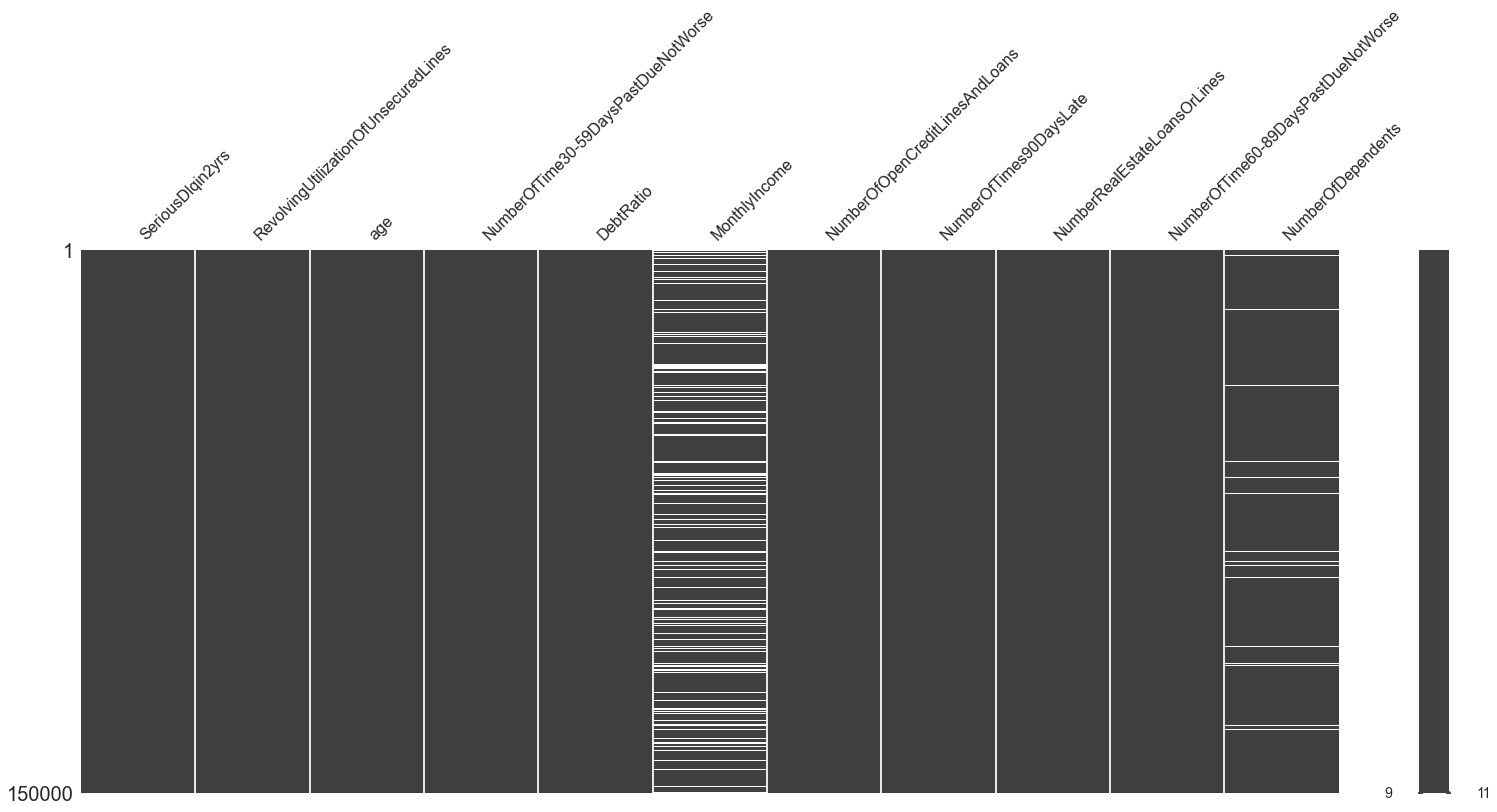

In [19]:
msno.matrix(df)

<AxesSubplot:>

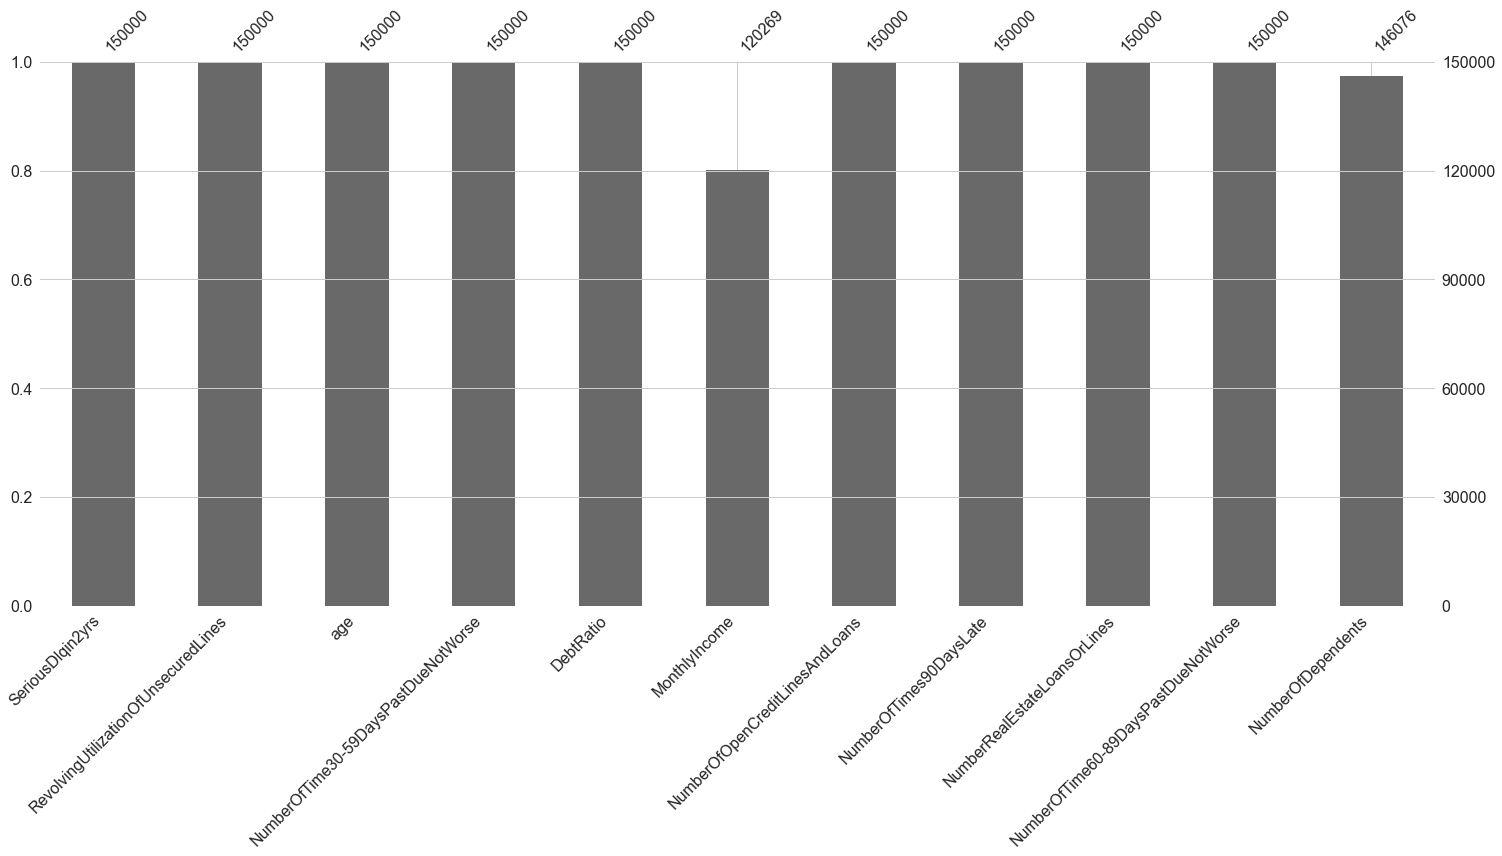

In [20]:
msno.bar(df)

## 3.2) Data Distribution

### 3.2.1) SeriousDlqin2yrs

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

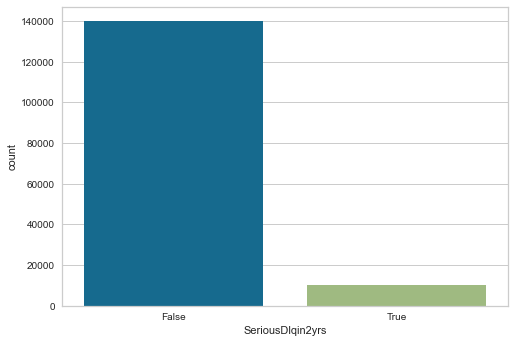

In [132]:
sns.countplot(x="SeriousDlqin2yrs", data=df)

In [22]:
print('Proporção de pessoas que passaram mais de 90 dias em inadiplência:',df.loc[df["SeriousDlqin2yrs"] == 1].shape[0]/df.shape[0])
print('Proporção de pessoas que não passaram mais de 90 dias em inadiplência:',df.loc[df["SeriousDlqin2yrs"] == 0].shape[0]/df.shape[0])

Proporção de pessoas que passaram mais de 90 dias em inadiplência: 0.06684
Proporção de pessoas que não passaram mais de 90 dias em inadiplência: 0.93316


### 3.2.2) RevolvingUtilizationOfUnsecuredLines

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

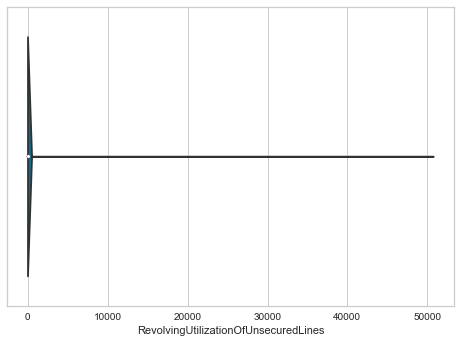

In [23]:
sns.violinplot(x='RevolvingUtilizationOfUnsecuredLines',data=df)

In [24]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [25]:
print('Proporção de pessoas que ultrapassaram o limite do crédito:',df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1].shape[0]/df.shape[0])
print('Proporção de pessoas que não ultrapassaram o limite do cartão: ',df.loc[df['RevolvingUtilizationOfUnsecuredLines'] <= 1].shape[0]/df.shape[0])

Proporção de pessoas que ultrapassaram o limite do crédito: 0.02214
Proporção de pessoas que não ultrapassaram o limite do cartão:  0.97786


Podemos ver que cerca de 2,2% dos registros possuem gastos no cartão de crédito superior ao seu limite. Vamos investigar esses registros mais a fundo para entendermos se são outliers ou não.

Vamos agora entender a relação entre a variável alvo e o uso do crédito para os registros de pessoas que não ultrapassaram seu limite

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

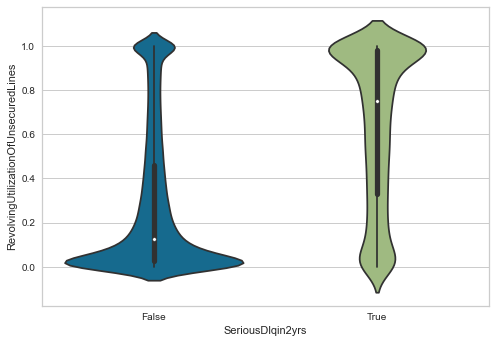

In [136]:
df1 = df.loc[df['RevolvingUtilizationOfUnsecuredLines']<=1]
sns.violinplot(x="SeriousDlqin2yrs",
               y='RevolvingUtilizationOfUnsecuredLines',
               data=df1)

In [27]:
print(
    'O gasto percentual médio do grupo de pessoas que não passou mais de 90 dias inadiplente é: ',
    df1['RevolvingUtilizationOfUnsecuredLines'].loc[df['SeriousDlqin2yrs'] == 0].mean())
print(
    'O gasto percentual médio do grupo de pessoas que não passou mais de 90 dias inadiplente é: ',
    df1['RevolvingUtilizationOfUnsecuredLines'].loc[df['SeriousDlqin2yrs'] == 1].mean())

O gasto percentual médio do grupo de pessoas que não passou mais de 90 dias inadiplente é:  0.2825023165730581
O gasto percentual médio do grupo de pessoas que não passou mais de 90 dias inadiplente é:  0.6376299567565303


In [28]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,2773.000000,3321.000000,3321.000000,3321.000000,3321.00000,3260.000000
mean,0.372478,259.773362,44.055405,1.016260,245.169459,5289.567977,6.373683,0.637760,0.682023,0.43240,0.917791
std,0.483538,1659.034074,12.655322,1.355169,939.844850,5134.134472,4.033118,1.325063,0.973476,0.85219,1.197826
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.019996,34.000000,0.000000,0.180627,2700.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.074633,43.000000,1.000000,0.374304,4184.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.301096,52.000000,2.000000,0.806048,6458.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


- Ao analisar a distribuição, fica evidente que há uma tendência de que pessoas que não não passaram mais de 90 dias inadiplentes tendem a consumir menos o seu limite de crédito.
- Além disso, ao menos 75% dos registros que ultrapassaram seu limite tem valores de RevolvingUtilizationOfUnsecuredLines próximos de 1.
- Logo, o indicado é indentificar e tratar valores mais altos, dado que podem ser outliers.

### 3.2.3) age

<AxesSubplot:xlabel='age'>

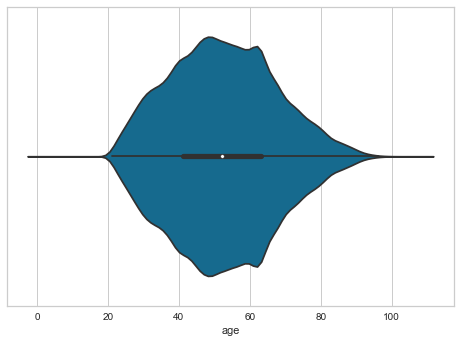

In [29]:
sns.violinplot(x='age',data=df)

In [13]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Podemos ver que o valor mínimo da distribuição é zero. Vamos buscar entender se esse é um caso isolado ou se há outras pessoas menores de idade.

In [30]:
print('Quantidade de pessoas abaixo dos 20 anos:',df.loc[df['age'] < 20].shape[0])

Quantidade de pessoas abaixo dos 20 anos: 1


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

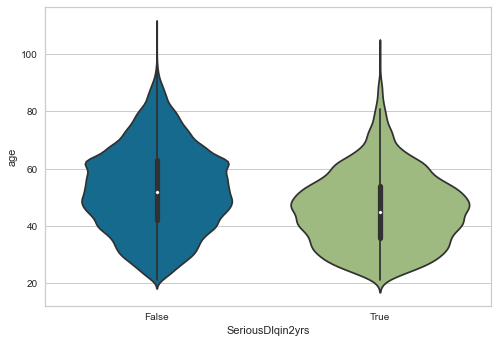

In [137]:
df2 = df.loc[df['age'] >= 20]
sns.violinplot(x="SeriousDlqin2yrs", y = 'age', data=df2)

In [36]:
print('Média de idade das pessoas que não passaram mais de 90 dias inadiplentes: ',int(df2['age'].loc[df2['SeriousDlqin2yrs']==0].mean()))
print('Média de idade das pessoas que passaram mais de 90 dias inadiplentes: ',int(df2['age'].loc[df2['SeriousDlqin2yrs']==1].mean()))

Média de idade das pessoas que não passaram mais de 90 dias inadiplentes:  52
Média de idade das pessoas que passaram mais de 90 dias inadiplentes:  45


### 3.2.4) NumberOfTime30-59DaysPastDueNotWorse

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

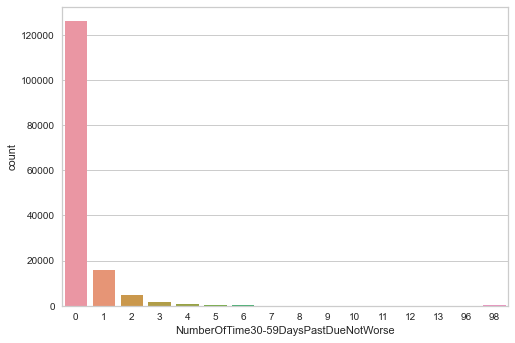

In [37]:
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse',data=df)

In [19]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
11         1
13         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

Os dados mostram que há uma tendência decrescente no número de vezes que uma pessoa passou entre 30 e 59 dias inadiplente, até chegar no valor de 13 vezes. Entretanto, há registros com valores de 96 e 98 que não seguem esse tendência. Vamos examiná-los a fundo.

In [38]:
df2.loc[df2['NumberOfTime30-59DaysPastDueNotWorse']>13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,269.000000,2.690000e+02,269.000000,269.000000,269.000000,148.000000,269.000000,269.000000,269.0,269.000000,238.000000
mean,0.546468,9.999999e-01,34.245353,97.962825,5.739667,2557.135135,0.007435,97.962825,0.0,97.962825,0.369748
std,0.498764,3.003190e-15,13.061823,0.270628,26.019024,2745.777653,0.086065,0.270628,0.0,0.270628,0.830490
min,0.000000,9.999999e-01,21.000000,96.000000,0.000000,0.000000,0.000000,96.000000,0.0,96.000000,0.000000
25%,0.000000,9.999999e-01,24.000000,98.000000,0.000000,1333.000000,0.000000,98.000000,0.0,98.000000,0.000000
50%,1.000000,9.999999e-01,29.000000,98.000000,0.000000,2168.500000,0.000000,98.000000,0.0,98.000000,0.000000
75%,1.000000,9.999999e-01,43.000000,98.000000,0.000000,3174.500000,0.000000,98.000000,0.0,98.000000,0.000000
max,1.000000,9.999999e-01,79.000000,98.000000,255.000000,28733.000000,1.000000,98.000000,0.0,98.000000,5.000000


- O grupo é formado por pessoas que estão muito próximas de atingirem seu limite de crédito. 
- A média da variável alvo é acima de 0.5, o que indica que a maior parte desses registros são de inadiplentes. 
- Além disso, ao menos 75% dos registros possuem DebtRatio igual a 0. 
- Os mesmos valores de 96 e 98 são vistos em outros dois campos: NumberOfTime60-89DaysPastDueNotWorse e NumberOfTimes90DaysLate

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

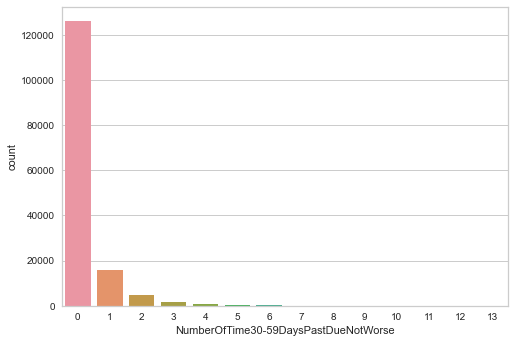

In [138]:
df3 = df.loc[df['NumberOfTime30-59DaysPastDueNotWorse']<=13]
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse',data=df3)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

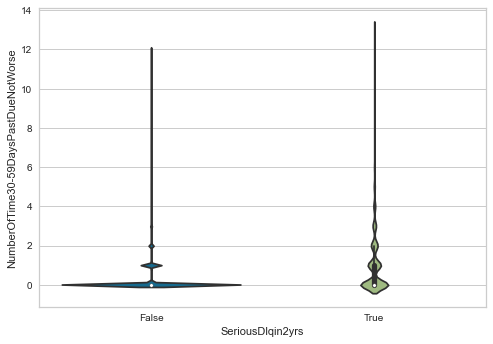

In [139]:
sns.violinplot(x="SeriousDlqin2yrs",
               y='NumberOfTime30-59DaysPastDueNotWorse',
               data=df3)

In [41]:
print('Média de vezes em que uma pessoa que não ficou inadiplente por mais de 90 dias ficou inadiplente entre 30 e 59 dias: ',round(df3['NumberOfTime30-59DaysPastDueNotWorse'].loc[df["SeriousDlqin2yrs"]==0].mean(),4))
print('Média de vezes em que uma pessoa que ficou inadiplente por mais de 90 dias ficou inadiplente entre 30 e 59 dias: ',round(df3['NumberOfTime30-59DaysPastDueNotWorse'].loc[df["SeriousDlqin2yrs"]==1].mean(),4))

Média de vezes em que uma pessoa que não ficou inadiplente por mais de 90 dias ficou inadiplente entre 30 e 59 dias:  0.1949
Média de vezes em que uma pessoa que ficou inadiplente por mais de 90 dias ficou inadiplente entre 30 e 59 dias:  0.9666


### 3.2.5) DebtRatio

<AxesSubplot:xlabel='DebtRatio'>

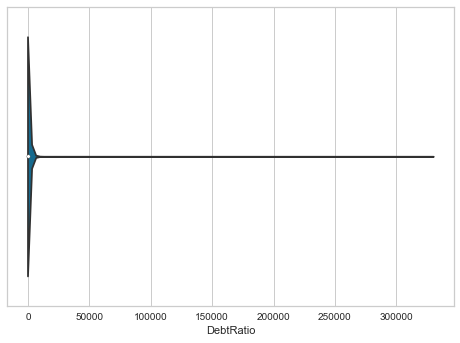

In [42]:
sns.violinplot(x='DebtRatio',data=df)

In [43]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [26]:
print('Proporção de pessoas com débitos mensais acima da renda mensal: ',df.loc[df['DebtRatio'] > 1].shape[0]/df.shape[0])
print('Proporção de pessoas com débitos mensais abaixo da renda mensal: ',df.loc[df['DebtRatio'] <= 1].shape[0]/df.shape[0])

Proporção de pessoas com débitos mensais acima da renda mensal:  0.23424666666666666
Proporção de pessoas com débitos mensais abaixo da renda mensal:  0.7657533333333333


- Cerca de 23% dos registros possuem débitos mensais superiores a sua renda mensal.

Vamos analisar o grupo dos 76% que possuem débitos mensais inferiores a sua renda mensal.

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

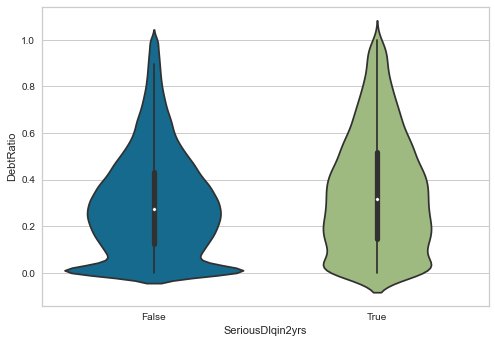

In [140]:
df4 =df.loc[(df['DebtRatio'] <= 1)]
sns.violinplot(x="SeriousDlqin2yrs",
               y='DebtRatio',
               data=df4)

In [45]:
print('Gastos mensais divididos pela renda média mensal do grupo que não ficou inadiplente por mais de 90 dias: ',round(df4['DebtRatio'].loc[df["SeriousDlqin2yrs"]==0].mean(),4))
print('Gastos mensais divididos pela renda média mensal do grupo que ficou inadiplente por mais de 90 dias: ',round(df4['DebtRatio'].loc[df["SeriousDlqin2yrs"]==1].mean(),4))

Gastos mensais divididos pela renda média mensal do grupo que não ficou inadiplente por mais de 90 dias:  0.2998
Gastos mensais divididos pela renda média mensal do grupo que ficou inadiplente por mais de 90 dias:  0.3481


- Através do gráfico, pode-se ver que a as distribuições de registros de DebtRatio abaixo de 1 são parecidas, com um leve aumento no segundo grupo.

Vamos analisar agora os registros que têm valores de DebtRatio acima de 1.

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

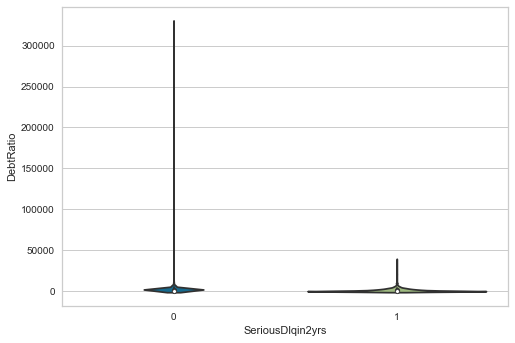

In [46]:
df5 =df.loc[(df['DebtRatio'] > 1)]
sns.violinplot(x="SeriousDlqin2yrs",
               y='DebtRatio',
               data=df5)

In [47]:
print('Gastos mensais divididos pela renda média mensal do grupo que não ficou inadiplente por mais de 90 dias: ',round(df5['DebtRatio'].loc[df["SeriousDlqin2yrs"]==0].mean(),4))
print('Gastos mensais divididos pela renda média mensal do grupo que ficou inadiplente por mais de 90 dias: ',round(df5['DebtRatio'].loc[df["SeriousDlqin2yrs"]==1].mean(),4))

Gastos mensais divididos pela renda média mensal do grupo que não ficou inadiplente por mais de 90 dias:  1521.0304
Gastos mensais divididos pela renda média mensal do grupo que ficou inadiplente por mais de 90 dias:  1290.3498


In [48]:
df.loc[df['DebtRatio'] > 1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,7233.000000,35137.000000,35137.000000,35137.000000,35137.000000,31689.000000
mean,0.065202,7.076243,55.006261,0.299286,1505.989566,2258.955067,8.071662,0.165979,1.082933,0.140393,0.436650
std,0.246885,239.510379,14.908925,2.841582,3999.026847,2831.168204,5.098427,2.806182,1.277702,2.784314,0.927896
min,0.000000,0.000000,21.000000,0.000000,1.000500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.022458,44.000000,0.000000,42.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.105250,55.000000,0.000000,907.000000,1577.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.490363,65.000000,0.000000,2210.000000,3333.000000,11.000000,0.000000,2.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,70000.000000,58.000000,98.000000,54.000000,98.000000,10.000000


- O segundo gráfico mostra uma tendência oposta a primeira, dado que pessoas pertencentes que não ficaram inadiplentes têm um DebtRatio maior.
- Podemos perceber que aproximadamente 6,5% das pessoas com DebtRatio acima de 1 não ficaram inadiplentes por mais de 90 dias. 
- Há bastantes valores faltantes de MonthlyIncome para esse grupo e ao menos 25% dos registros não nulos possuem MonthlyIncome de 1.

Vamos analisar os conjuntos de dados que contém pessoas com valores de DebtRatio acima de 1 e valores de MonthlyIncome nulos e não nulos.

In [49]:
df.loc[(df['DebtRatio'] > 1)&(df['MonthlyIncome'].isna())].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000,0.0,27904.000000,27904.000000,27904.000000,27904.000000,24456.000000
mean,0.055834,7.054663,56.187823,0.289062,1782.953985,NaN,7.529351,0.184741,0.928541,0.154817,0.326709
std,0.229606,224.826301,14.961007,3.157187,4362.924654,NaN,4.796806,3.136096,1.042506,3.116346,0.821098
min,0.000000,0.000000,21.000000,0.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.019314,46.000000,0.000000,279.750000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.084309,57.000000,0.000000,1295.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.410516,66.000000,0.000000,2478.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [85]:
df.loc[(df['DebtRatio'] <= 1)&(df['MonthlyIncome'].notna())].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,1.130360e+05,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,0.067448,5.819271,51.343660,0.384524,0.306106,6.952491e+03,8.668548,0.219496,1.014588,0.194425,0.854613
std,0.250797,254.840501,14.464922,3.602614,0.223216,1.477571e+04,5.127241,3.571560,1.080855,3.554690,1.148483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034309,41.000000,0.000000,0.133078,3.624750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.172917,51.000000,0.000000,0.278106,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.571343,62.000000,0.000000,0.440089,8.414250e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,1.000000,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


- O conjunto de dados que contém valores de DebtRatio acima de 1 e valores de MonthlyIncome não nulos têm ao menos 50% dos seus dados de DebtRatio com valores próximos a 1. 
- Além disso, ele também possui ao menos 25% dos registros com valores de MonthlyIncome entre 0 e 1.

Vamos dar uma olhada mais a fundo nos registros que contém DebtRatio menores ou iguais a 1

In [336]:
df4.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,1.130360e+05,114863.000000,114863.000000,114863.000000,114863.000000,114387.000000
mean,0.067341,5.734029,51.465885,0.458276,0.303022,6.952491e+03,8.569339,0.296562,0.998450,0.270975,0.846031
std,0.250613,252.806615,14.629743,4.525610,0.226287,1.477571e+04,5.154799,4.504204,1.079713,4.491293,1.145868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.032852,41.000000,0.000000,0.125981,3.624750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.171413,51.000000,0.000000,0.274505,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.577672,62.000000,0.000000,0.438098,8.414250e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,1.000000,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


- Pode-se perceber que esse grupo possui uma menor quantidade de valores nulos de MonthlyIncome.
- Além disso, diferentemente dos outros grupos, o primeiro quartil não é composto exclusivamente por valores de MonthlyIncome entre 0 e 1 

Como conclusão, tem-se que há uma predominância de valores entre 0 e 1 ou nulos em registros que contém valores de DebtRatio acima de 1. Deve-se levar em consideração o fato desses registros serem outliers.

### 3.2.6) MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome'>

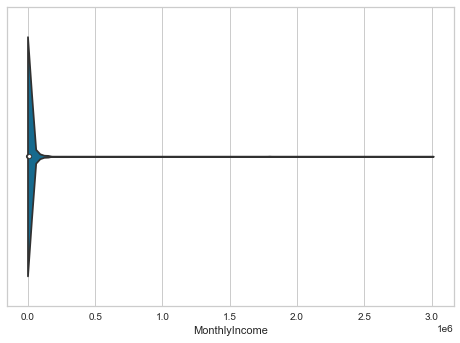

In [86]:
sns.violinplot(x='MonthlyIncome',data=df)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>

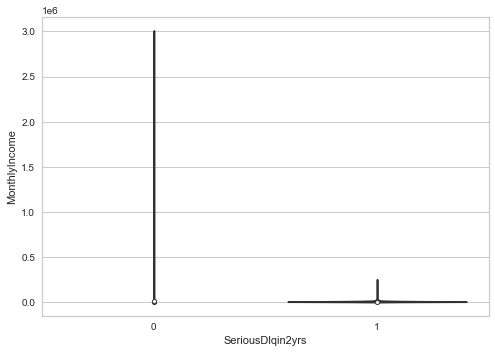

In [87]:
sns.violinplot(x="SeriousDlqin2yrs",
               y='MonthlyIncome',
               data=df)

In [88]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [89]:
print('Renda mensal média do grupo que não ficou inadiplente por mais de 90 dias: ', round(df['MonthlyIncome'].loc[df['SeriousDlqin2yrs']==0].mean(),2))
print('Renda mensal média do grupo que ficou inadiplente por mais de 90 dias: ', round(df['MonthlyIncome'].loc[df['SeriousDlqin2yrs']==1].mean(),2))

Renda mensal média do grupo que não ficou inadiplente por mais de 90 dias:  6747.84
Renda mensal média do grupo que ficou inadiplente por mais de 90 dias:  5630.83


### 3.2.7) NumberOfOpenCreditLinesAndLoans

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans'>

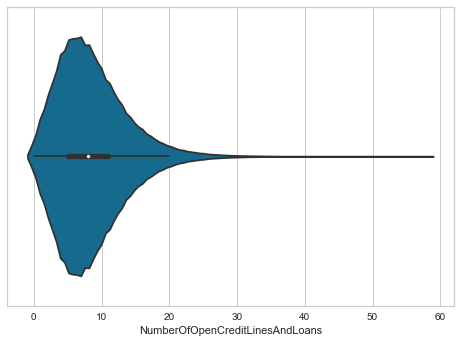

In [90]:
sns.violinplot(x='NumberOfOpenCreditLinesAndLoans',data=df)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfOpenCreditLinesAndLoans'>

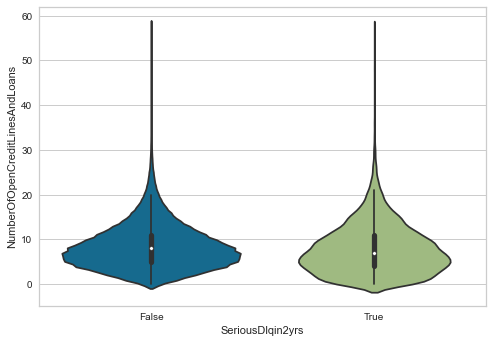

In [141]:
sns.violinplot(x="SeriousDlqin2yrs",
               y='NumberOfOpenCreditLinesAndLoans',
               data=df)

In [92]:
print('Número de linhas de crédito abertas do grupo que não ficou inadiplente por mais de 90 dias: ', round(df['NumberOfOpenCreditLinesAndLoans'].loc[df['SeriousDlqin2yrs']==0].mean(),2))
print('Número de linhas de crédito abertas do grupo que ficou inadiplente por mais de 90 dias: ', round(df['NumberOfOpenCreditLinesAndLoans'].loc[df['SeriousDlqin2yrs']==1].mean(),2))

Número de linhas de crédito abertas do grupo que não ficou inadiplente por mais de 90 dias:  8.49
Número de linhas de crédito abertas do grupo que ficou inadiplente por mais de 90 dias:  7.88


### 3.2.8) NumberRealEstateLoansOrLines

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

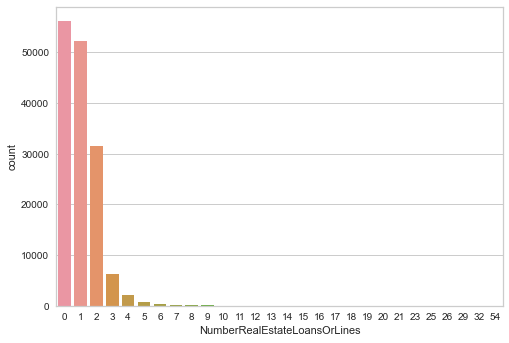

In [93]:
sns.countplot(x='NumberRealEstateLoansOrLines',data=df)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberRealEstateLoansOrLines'>

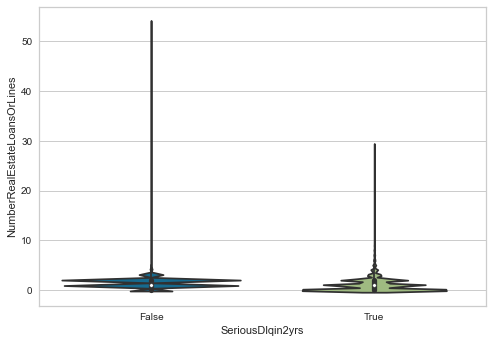

In [142]:
sns.violinplot(x="SeriousDlqin2yrs",
               y='NumberRealEstateLoansOrLines',
               data=df)

In [95]:
print("Número médio de linhas empréstimo de imóveis do grupo que não ficou inadiplente por mais de 90 dias: ",round(df['NumberRealEstateLoansOrLines'].loc[df['SeriousDlqin2yrs'] == 0].mean(),2))
print("Número médio de linhas empréstimo de imóveis do grupo que ficou inadiplente por mais de 90 dias: ",round(df['NumberRealEstateLoansOrLines'].loc[df['SeriousDlqin2yrs'] == 1].mean(),2))

Número médio de linhas empréstimo de imóveis do grupo que não ficou inadiplente por mais de 90 dias:  1.02
Número médio de linhas empréstimo de imóveis do grupo que ficou inadiplente por mais de 90 dias:  0.99


### 3.2.9) NumberOfTime60-89DaysPastDueNotWorse

<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='count'>

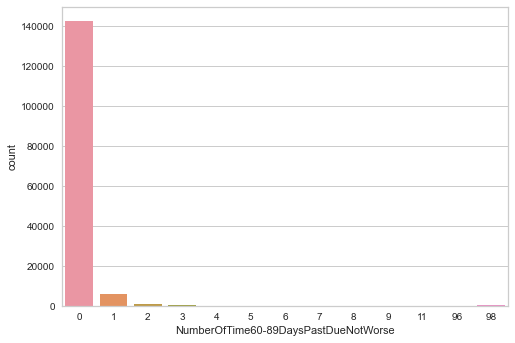

In [96]:
sns.countplot(x='NumberOfTime60-89DaysPastDueNotWorse',data=df)

In [97]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
9          1
11         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='count'>

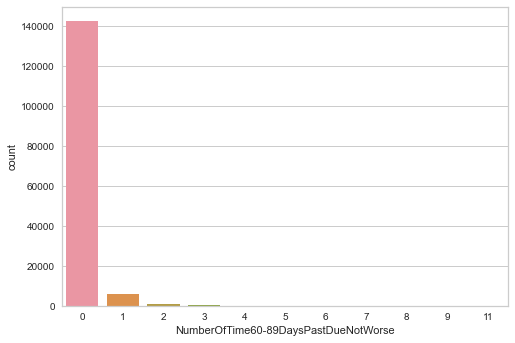

In [143]:
df6 = df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] <= 11]
sns.countplot(x='NumberOfTime60-89DaysPastDueNotWorse',
              data=df6)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTime60-89DaysPastDueNotWorse'>

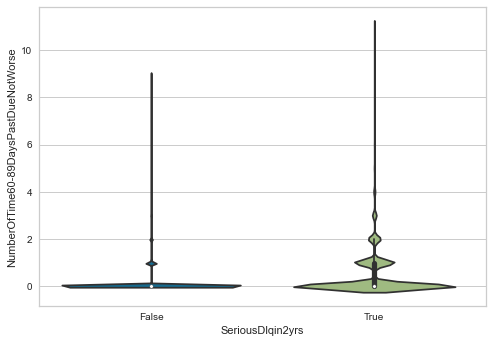

In [144]:
sns.violinplot(x='SeriousDlqin2yrs',
               y='NumberOfTime60-89DaysPastDueNotWorse',
               data=df6)

In [117]:
print(
    'Média de vezes que o grupo de pessoas que não passou mais de 90 dias inadiplente ficou entre 60 e 89 inadiplente: ',
    round(
        df6['NumberOfTime60-89DaysPastDueNotWorse'].loc[(
            df6['SeriousDlqin2yrs'] == 0)].mean(), 4))
print(
    'Média de vezes que o grupo de pessoas que passou mais de 90 dias inadiplente ficou entre 60 e 89 inadiplente: ',
    round(
        df6['NumberOfTime60-89DaysPastDueNotWorse'].loc[(
            df6['SeriousDlqin2yrs'] == 1)].mean(), 4))

Média de vezes que o grupo de pessoas que não passou mais de 90 dias inadiplente ficou entre 60 e 89 inadiplente:  0.0413
Média de vezes que o grupo de pessoas que passou mais de 90 dias inadiplente ficou entre 60 e 89 inadiplente:  0.3978


Em média o grupo de pessoas que passou mais de 90 dias em inadiplência passou pelo processo de ficar entre 60 e 89 dias inadiplente mais vezes do que o grupo de pessoas que não passou mais de 90 dias em inadiplência.

### 3.2.10) NumberOfTimes90DaysLate

<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='count'>

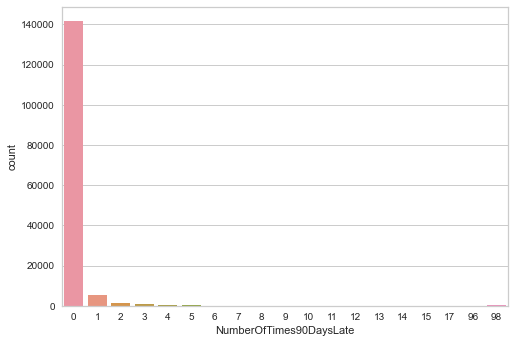

In [111]:
sns.countplot(x='NumberOfTimes90DaysLate',data=df)

In [112]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='count'>

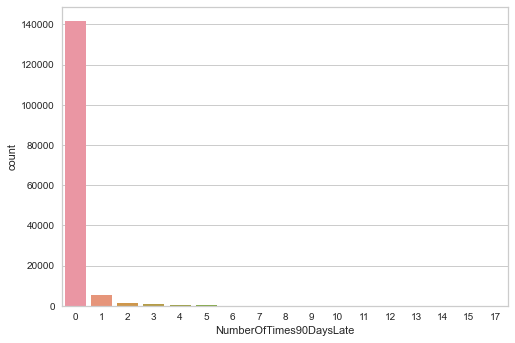

In [146]:
df7 = df.loc[df['NumberOfTimes90DaysLate'] <= 17]
sns.countplot(x='NumberOfTimes90DaysLate',
              data=df7)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTimes90DaysLate'>

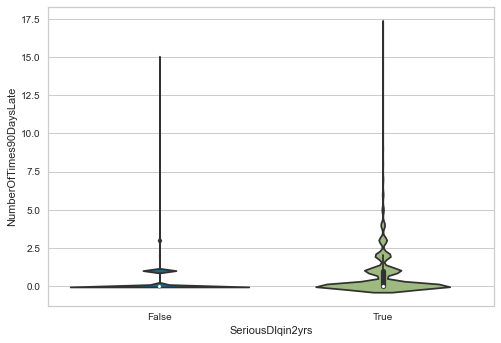

In [147]:
sns.violinplot(x='SeriousDlqin2yrs',
               y='NumberOfTimes90DaysLate',
               data=df7)

In [119]:
print(
    'Média de vezes que o grupo de pessoas que não passou mais de 90 dias inadiplente ficou 90 dias inadiplente: ',
    round(
        df7['NumberOfTimes90DaysLate'].loc[(
            df7['SeriousDlqin2yrs'] == 0)].mean(), 4))
print(
    'Média de vezes que o grupo de pessoas que passou mais de 90 dias inadiplente ficou 90 dias inadiplente: ',
    round(
        df7['NumberOfTimes90DaysLate'].loc[(
            df['SeriousDlqin2yrs'] == 1)].mean(), 4))

Média de vezes que o grupo de pessoas que não passou mais de 90 dias inadiplente ficou 90 dias inadiplente:  0.0499
Média de vezes que o grupo de pessoas que passou mais de 90 dias inadiplente ficou 90 dias inadiplente:  0.665


### 3.2.11) NumberOfDependents

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

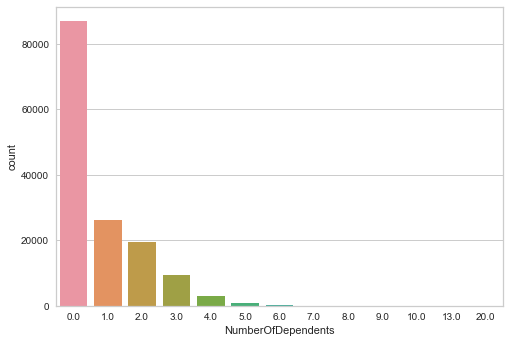

In [120]:
sns.countplot(x='NumberOfDependents',data=df)

In [125]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [121]:
df[df['NumberOfDependents'].isna()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,0.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,0.045617,10.745132,59.588940,0.908257,1083.812181,NaN,5.604230,0.834608,0.590979,0.812181,NaN
std,0.208679,237.699246,18.634168,8.679394,4186.731843,NaN,4.096353,8.679228,0.914455,8.678008,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.008474,48.000000,0.000000,21.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047458,61.000000,0.000000,358.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.268155,74.000000,0.000000,1559.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


- Todos os registros em que o NumberOfDependents é nulo também possui valores de MonthlyIncome nulos
- Além disso, esses registros também têm valores de DebtRatio bastante altos

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfDependents'>

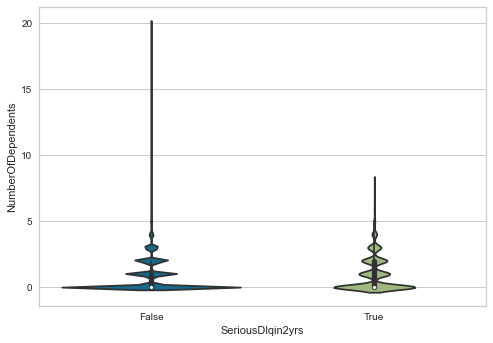

In [148]:
sns.violinplot(x='SeriousDlqin2yrs',
               y='NumberOfDependents',
               data=df)

In [124]:
print(
    'Número médio de dependentes do grupo não ficou mais de 90 dias inadiplente: ',
    round(
        df['NumberOfDependents'].loc[(
            df['SeriousDlqin2yrs'] == 0)].mean(), 4))
print(
    'Número médio de dependentes do grupo ficou mais de 90 dias inadiplente: ',
    round(
        df['NumberOfDependents'].loc[(
            df['SeriousDlqin2yrs'] == 1)].mean(), 4))

Número médio de dependentes do grupo não ficou mais de 90 dias inadiplente:  0.7434
Número médio de dependentes do grupo ficou mais de 90 dias inadiplente:  0.9482
